# Visualização de Dados

## Importando bibliotecas e DataFrames

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
%store -r df
%store -r ages
%store -r cases

#### 1. Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. Inclua todos os bairros remanescentes em uma categoria denominada “Ou-tros.” Denote as informações de maneira percentual;

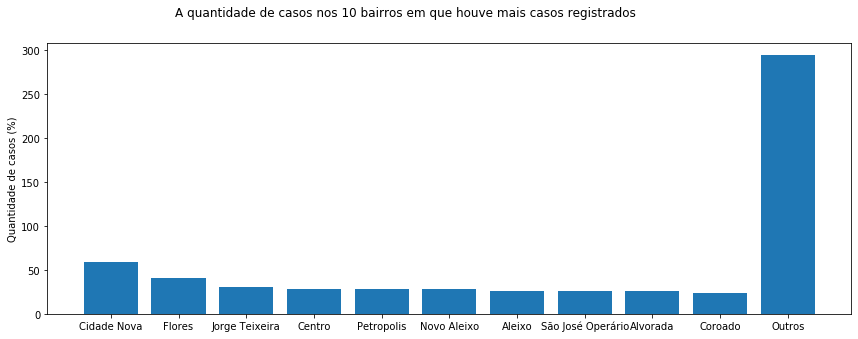

In [3]:
names = ['Cidade Nova', 'Flores', 'Jorge Teixeira', 'Centro', 
           'Petropolis', 'Novo Aleixo', 'Aleixo', 'São José Operário',
           'Alvorada', 'Coroado', 'Outros']
values = [59.2, 40.87, 30.84, 28.87, 28.6, 28.53, 26.56, 26.46, 26.05,
          24.53, 294.26]

plt.figure(figsize=(49, 5))
plt.suptitle('A quantidade de casos nos 10 bairros em que houve mais casos registrados')
plt.subplot(132)
plt.ylabel('Quantidade de casos (%)')
plt.bar(names, values)
plt.show()

#### 2. Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?

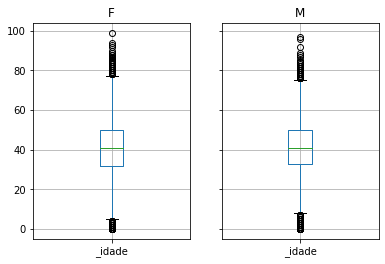

In [4]:
df.groupby('_sexo').boxplot(column=['_idade'])
plt.show()

#### 3. Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados

In [5]:
df_cases = pd.to_datetime(df['_dt_notificacao'], format="%d/%m/%Y")
array_dates = np.sort(df_cases.dropna().dt.strftime("%m/%d/%Y"))
unique_elements, counts_elements = np.unique(array_dates, return_counts=True)
result = np.asarray((unique_elements[::-1], counts_elements[::-1]))
last_ten_days_dates = result[0][:10][::-1]
last_ten_days_values = result[1][:10][::-1]

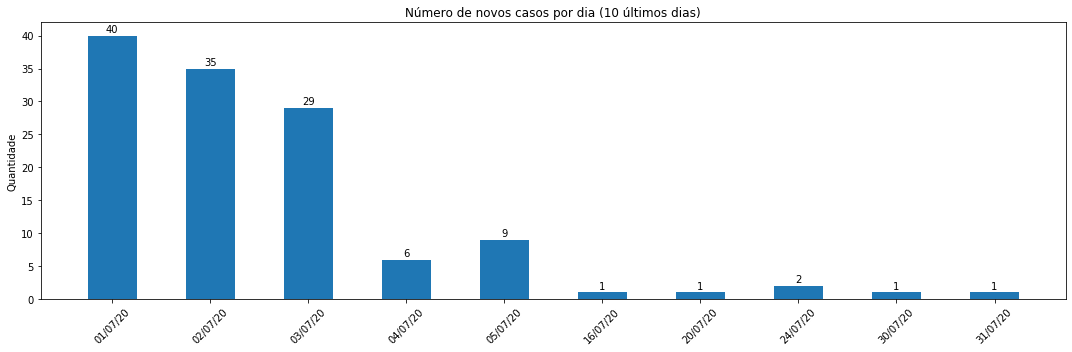

In [6]:
labels = pd.to_datetime(last_ten_days_dates).strftime("%d/%m/%y")
values = last_ten_days_values

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(15,5))
rects = ax.bar(x - width/2, values, width, align= 'edge')

ax.set_ylabel('Quantidade')
ax.set_title("Número de novos casos por dia (10 últimos dias)")
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(labels)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1.5),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects)
fig.tight_layout()

plt.show()

#### 4. Repita o gráfico anterior considerando o número de casos recuperado;

In [8]:
df['_dt_notificacao'] = pd.to_datetime(df['_dt_notificacao'], format="%d/%m/%Y")
df_cases_recovered = df[df['_conclusao'].isin(['Recuperado'])]
array_dates = np.sort(df_cases_recovered['_dt_notificacao'].dropna().dt.strftime("%m/%d/%Y"))
unique_elements, counts_elements = np.unique(array_dates, return_counts=True)
result = np.asarray((unique_elements[::-1], counts_elements[::-1]))
recovered_days_dates = result[0][:10][::-1]
recovered_days_values = result[1][:10][::-1]

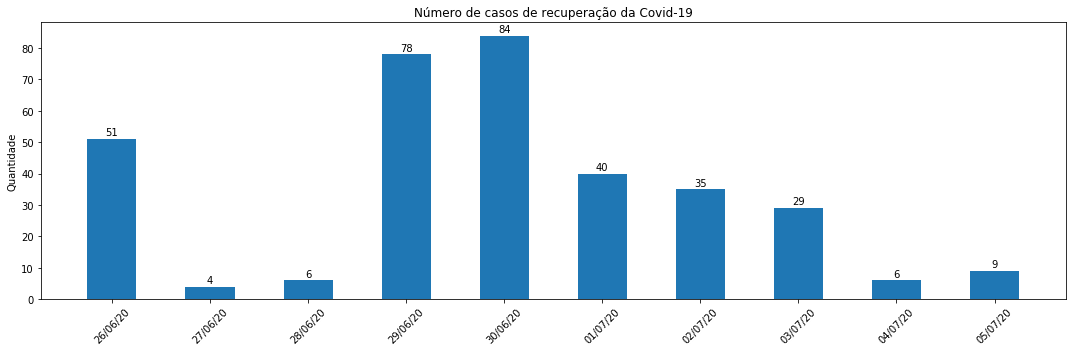

In [9]:
labels = pd.to_datetime(recovered_days_dates).strftime("%d/%m/%y")
values = recovered_days_values

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(15, 5))
rects = ax.bar(x - width/2, values, width, align='edge')

ax.set_ylabel('Quantidade')
ax.set_title("Número de casos de recuperação da Covid-19")
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(labels)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1.5),
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects)
fig.tight_layout()

plt.show()

#### 5. Construa um histograma que denote a quantidade percentual de casos por grupo etário, considerando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.);

#### 6. Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo;

In [10]:
array_month = df['_dt_notificacao'].dt.strftime('%m/%Y')
unique_elements, counts_elements = np.unique(array_month, return_counts=True)

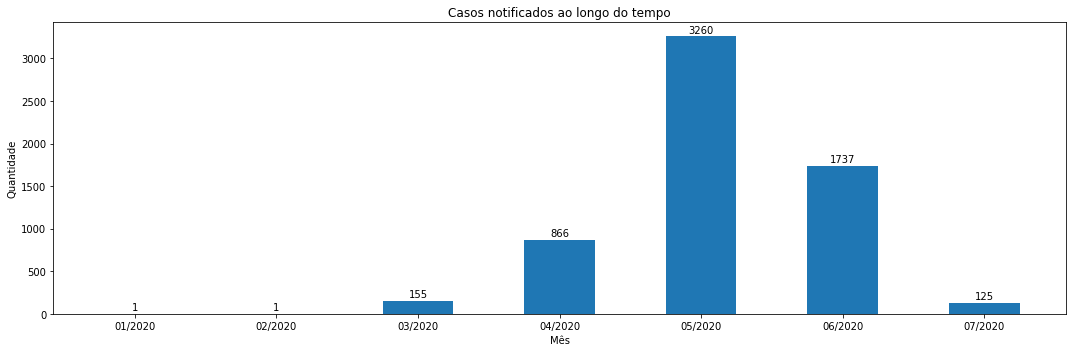

In [11]:
labels = unique_elements
values = counts_elements

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(15,5))
rects = ax.bar(x - width/2, values, width, align= 'edge')

ax.set_ylabel('Quantidade')
ax.set_xlabel('Mês')

ax.set_title("Casos notificados ao longo do tempo")
ax.set_xticks(x)
ax.set_xticklabels(labels)

autolabel(rects)
fig.tight_layout()

plt.show()

#### 7. Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível observar alguma tendência?